In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
train_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv", index_col=0)
# sns.set_style("whitegrid")
# sns.set(rc={'figure.figsize': (12, 6)})
%config IPCompleter.greedy=True

In [11]:
test_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv", index_col=0)

In [13]:
test_data.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [10]:
train_data.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [21]:
X_train = train_data[["sepal length", "sepal width", "petal length", "petal width"]]
X_test = test_data[["sepal length", "sepal width", "petal length", "petal width"]]
y_train = train_data.species
y_test = test_data.species

In [23]:
from sklearn.model_selection import cross_val_score
scores_data = pd.DataFrame()
np.random.seed(0)
for max_depth in range(1,100):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({"max_depth": [max_depth], 
                                    "train_score": [train_score],
                                    "test_score": [test_score],
                                    "cross_val_score": [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [26]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.94,0.96
0,5,1.00,0.92,0.96


In [32]:
scores_data_long = pd.melt(scores_data, id_vars="max_depth", 
                           value_vars=["train_score", "test_score", "cross_val_score"],
                           var_name="set_type",
                           value_name="score")

In [34]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<AxesSubplot:xlabel='max_depth', ylabel='score'>

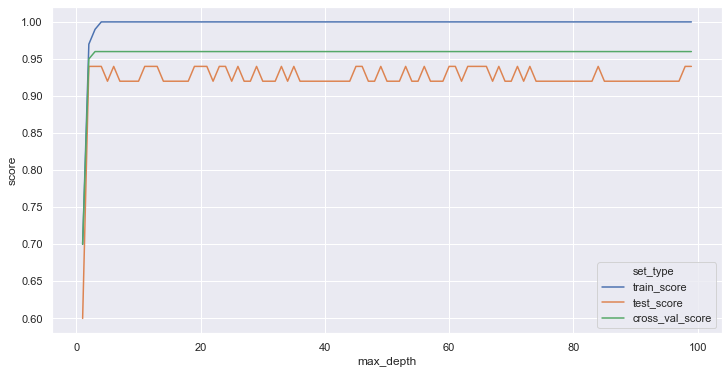

In [33]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (12, 6)})
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")